<a href="https://colab.research.google.com/github/trihadianto/PCD/blob/main/PCD_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

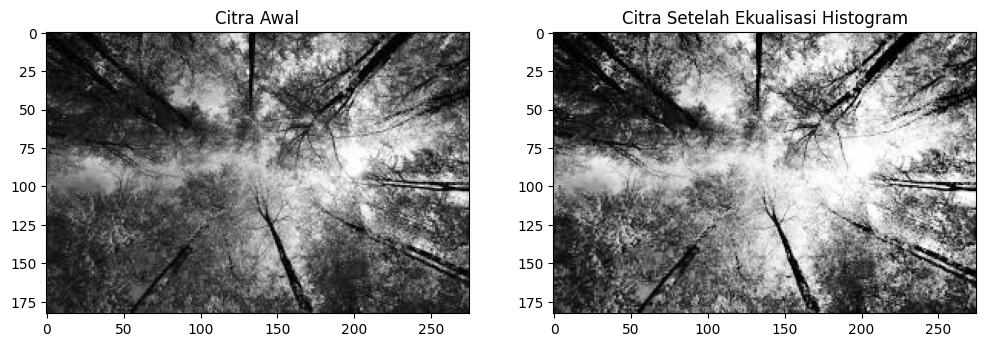

In [5]:
import imageio.v3 as img
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Fungsi untuk ekualisasi histogram
def histogram_equalization(image):
    # Hitung histogram dan CDF
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Normalisasi CDF
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Terapkan CDF ke citra
    image_equalized = cdf[image]
    return image_equalized

# Baca citra
image = img.imread('/content/pemandangan.jfif', mode='L')

# Ekualisasi histogram
image_equalized = histogram_equalization(image)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Citra Setelah Ekualisasi Histogram")
plt.imshow(image_equalized, cmap='gray')
plt.show()
